# Heart Disease

Heart Attack | Prediction
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

In [81]:
ls

AHeartDisease.ipynb  heart.csv                           heart-disease-uci.zip
classification/      HeartDisease.csv                    tree.dot
health-robot.jpg     heart-disease-dataset-from-uci.zip
heart-attack.jpg     HeartDisease.ipynb


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn import tree
import sys

In [83]:
trainx = pd.read_csv("./heart.csv")

In [84]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [87]:
# Category types
# trainx['sex'] = trainx['sex'].astype('object')
# trainx['cp'] = trainx['cp'].astype('object')
# trainx['fbs'] = trainx['fbs'].astype('object')
# trainx['restecg'] = trainx['restecg'].astype('object')
# trainx['exang'] = trainx['exang'].astype('object')
# trainx['slope'] = trainx['slope'].astype('object')
# trainx['thal'] = trainx['thal'].astype('object')
# trainx['ca'] = trainx['ca'].astype('object')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [88]:
print(trainx.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


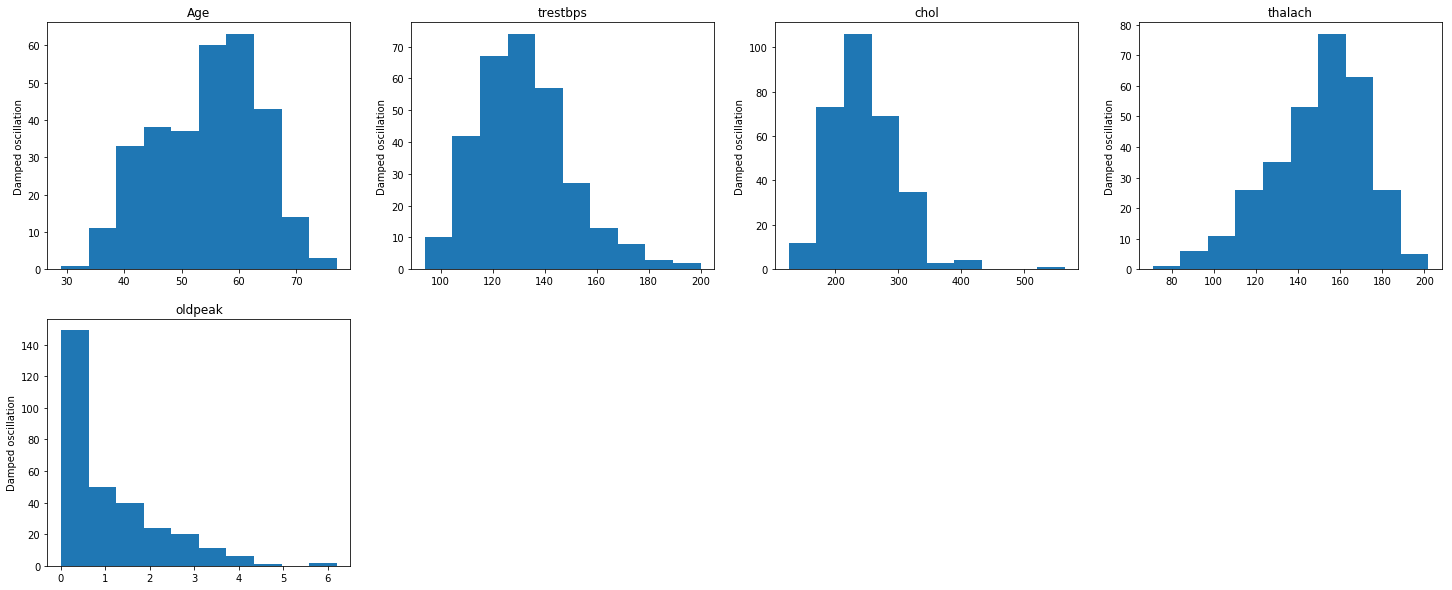

In [89]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])


plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('Damped oscillation')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('Damped oscillation')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('Damped oscillation')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('Damped oscillation')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('Damped oscillation')

plt.show()

Text(0.5,1,'ca')

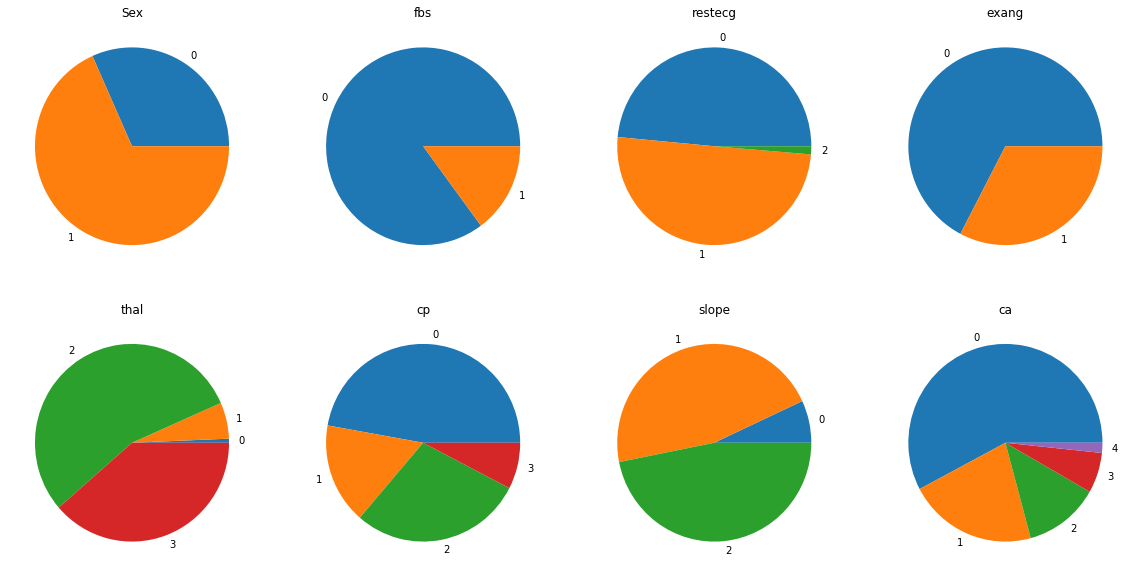

In [90]:
plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
labels = ["0", "1"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels)
plt.title('Sex')

plt.subplot(2, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels)
plt.title('fbs')

plt.subplot(2, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels)
plt.title('restecg')

plt.subplot(2, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels)
plt.title('exang')

plt.subplot(2, 4, 5)
labels = ["0", "1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels)
plt.title('thal')

plt.subplot(2, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels)
plt.title('cp')

plt.subplot(2, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels)
plt.title('slope')

plt.subplot(2, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels)
plt.title('ca')



In [91]:
from sklearn.model_selection import train_test_split

# Create a new array with the added features: features_two
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2, train_size=0.28)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((84, 13), (84,))
((61, 13), (61,))


# Trees

In [92]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
from sklearn.metrics import confusion_matrix
print(confusion_matrix(model1.predict(testX), testY))


from sklearn import metrics

y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

importances = model1.feature_importances_



Train: 0.9642857142857143
Test: 0.6065573770491803
[[16 10]
 [14 21]]


(array([0.        , 0.43458695, 0.16045409, 0.04807864, 0.03675131,
       0.10393055, 0.08820315, 0.        , 0.        , 0.10983249,
       0.01816281, 0.        , 0.        ]), 0.8052805280528053)


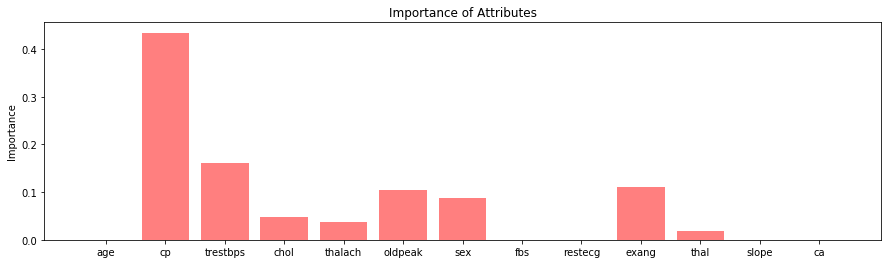

In [93]:
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

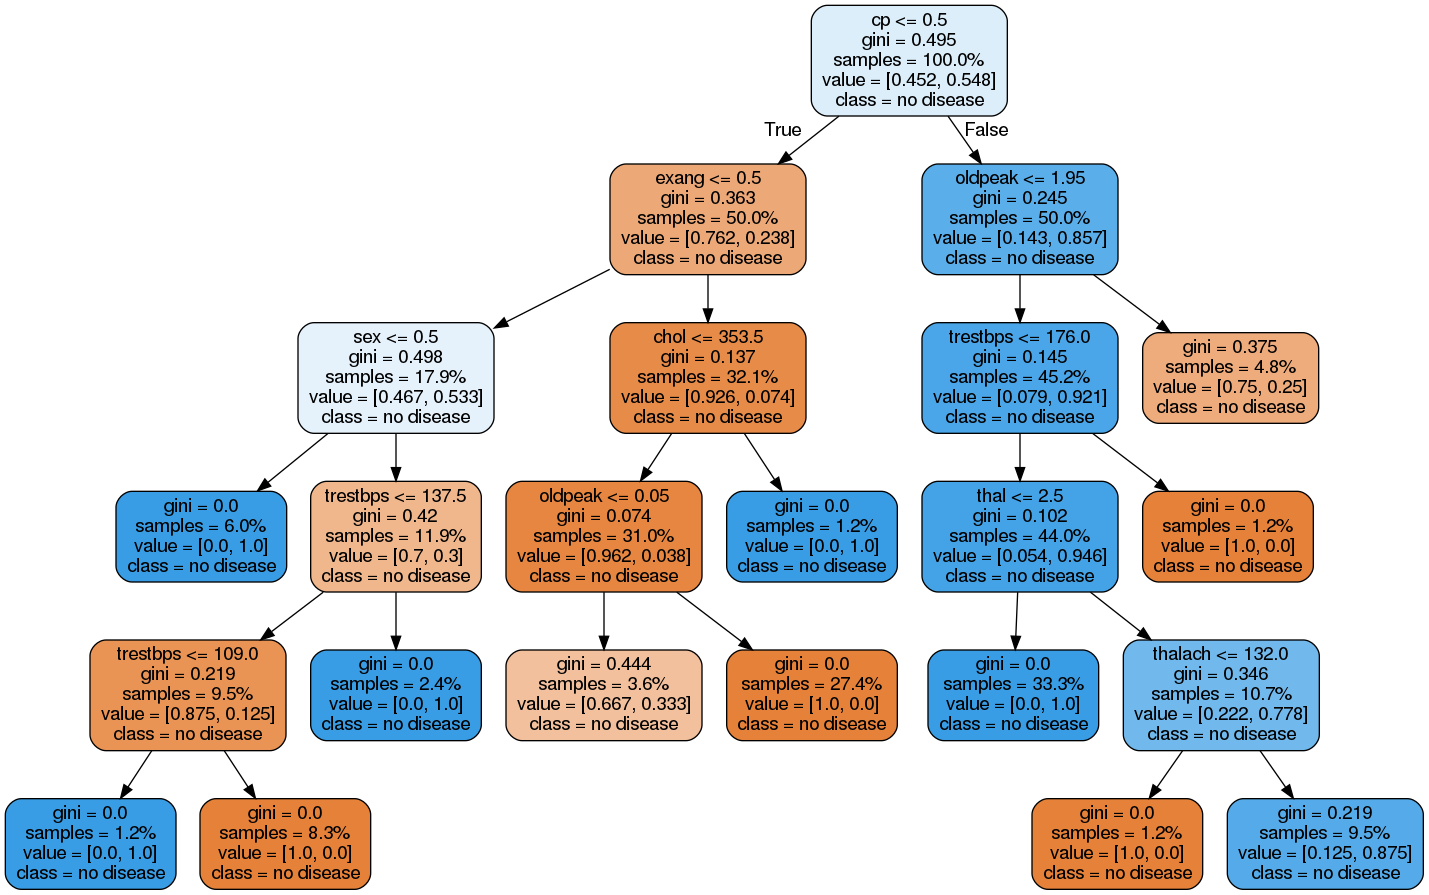

In [94]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename = 'tree.png')

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')
Image(graph.create_png())


# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model2 = gnb.fit(trainX, trainY)

#Print the score on the train data
print(model2.score(trainX, trainY))
#Print the score on the test data
print(model2.score(testX, testY))

y_pred2 = model2.predict(testX)
# print(y_pred2)
print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
print(metrics.classification_report(testY, y_pred2))
from sklearn.metrics import confusion_matrix

confusion_matrix(model2.predict(testX), testY)

0.8571428571428571
0.7540983606557377
('Accuracy: ', 0.7540983606557377)
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

   micro avg       0.75      0.75      0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



array([[20,  5],
       [10, 26]])

# Neural Network

In [96]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (1), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))


On training
0.9404761904761905
[[33  0]
 [ 5 46]]

On test
0.6885245901639344
[[17  6]
 [13 25]]
